In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.read_csv("D://mamta/women_train.csv")
df2=pd.read_csv("D://mamta/women_test.csv")
df=pd.concat([df1,df2],keys=("train","test"))

In [2]:
df.tail()

ID  Day_No  Course_ID       Course_Domain Course_Type  \
test 35995  548083     938        600  Software Marketing     Program   
     35996  548084     939        600  Software Marketing     Program   
     35997  548085     940        600  Software Marketing     Program   
     35998  548086     941        600  Software Marketing     Program   
     35999  548087     942        600  Software Marketing     Program   

            Short_Promotion  Public_Holiday  Long_Promotion  User_Traffic  \
test 35995                1               0               1           NaN   
     35996                1               0               1           NaN   
     35997                1               0               1           NaN   
     35998                1               0               1           NaN   
     35999                1               0               1           NaN   

            Competition_Metric  Sales  
test 35995                0.07    NaN  
     35996                0.07    NaN  
     35997                0.07    NaN  
     35998                0.07    NaN  
     35999                0.07    NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 548087 entries, ('train', 0) to ('test', 35999)
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  548087 non-null  int64  
 1   Day_No              548087 non-null  int64  
 2   Course_ID           548087 non-null  int64  
 3   Course_Domain       548087 non-null  object 
 4   Course_Type         548087 non-null  object 
 5   Short_Promotion     548087 non-null  int64  
 6   Public_Holiday      548087 non-null  int64  
 7   Long_Promotion      548087 non-null  int64  
 8   User_Traffic        512087 non-null  float64
 9   Competition_Metric  546203 non-null  float64
 10  Sales               512087 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 52.5+ MB


In [4]:
df2.isnull().sum()

ID                      0
Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
dtype: int64

In [5]:
df.Course_Type.value_counts()

Course     281347
Program    264856
Degree       1884
Name: Course_Type, dtype: int64

In [6]:
df.corr()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
ID,1.000000,0.001295,0.999996,0.000004,0.001354,-0.039447,0.033604,-0.007414,0.017037
Day_No,0.001295,1.000000,-0.000372,0.017254,0.003717,-0.014903,0.021511,0.002382,0.060012
Course_ID,0.999996,-0.000372,1.000000,-0.000024,0.001345,-0.039483,0.033520,-0.007368,0.016894
Short_Promotion,0.000004,0.017254,-0.000024,1.000000,-0.013007,-0.001010,0.198785,0.000160,0.367762
Public_Holiday,0.001354,0.003717,0.001345,-0.013007,1.000000,0.008749,-0.108305,-0.000740,-0.135052
Long_Promotion,-0.039447,-0.014903,-0.039483,-0.001010,0.008749,1.000000,-0.204289,-0.119880,-0.109455
User_Traffic,0.033604,0.021511,0.033520,0.198785,-0.108305,-0.204289,1.000000,-0.148775,0.829741
Competition_Metric,-0.007414,0.002382,-0.007368,0.000160,-0.000740,-0.119880,-0.148775,1.000000,-0.022085
Sales,0.017037,0.060012,0.016894,0.367762,-0.135052,-0.109455,0.829741,-0.022085,1.000000


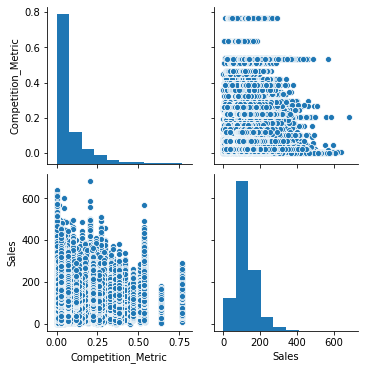

In [8]:
sns.pairplot(df[["Competition_Metric","Sales"]])

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Course_Domain"]=le.fit_transform(df["Course_Domain"])
df["Course_Type"]=le.fit_transform(df["Course_Type"])

In [8]:
df.isnull().sum()

ID                        0
Day_No                    0
Course_ID                 0
Course_Domain             0
Course_Type               0
Short_Promotion           0
Public_Holiday            0
Long_Promotion            0
User_Traffic          36000
Competition_Metric     1884
Sales                 36000
dtype: int64

In [9]:
df.corr()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
ID,1.000000,0.001295,0.999996,0.028247,0.041029,0.000004,0.001354,-0.039447,0.033604,-0.007414,0.017037
Day_No,0.001295,1.000000,-0.000372,-0.005687,0.004134,0.017254,0.003717,-0.014903,0.021511,0.002382,0.060012
Course_ID,0.999996,-0.000372,1.000000,0.028250,0.041006,-0.000024,0.001345,-0.039483,0.033520,-0.007368,0.016894
Course_Domain,0.028247,-0.005687,0.028250,1.000000,0.207113,-0.000386,0.003087,0.147603,-0.270252,0.116412,-0.028636
Course_Type,0.041029,0.004134,0.041006,0.207113,1.000000,0.000279,-0.002429,0.019479,0.035703,0.138227,0.136289
Short_Promotion,0.000004,0.017254,-0.000024,-0.000386,0.000279,1.000000,-0.013007,-0.001010,0.198785,0.000160,0.367762
Public_Holiday,0.001354,0.003717,0.001345,0.003087,-0.002429,-0.013007,1.000000,0.008749,-0.108305,-0.000740,-0.135052
Long_Promotion,-0.039447,-0.014903,-0.039483,0.147603,0.019479,-0.001010,0.008749,1.000000,-0.204289,-0.119880,-0.109455
User_Traffic,0.033604,0.021511,0.033520,-0.270252,0.035703,0.198785,-0.108305,-0.204289,1.000000,-0.148775,0.829741
Competition_Metric,-0.007414,0.002382,-0.007368,0.116412,0.138227,0.000160,-0.000740,-0.119880,-0.148775,1.000000,-0.022085


In [10]:
df=df.drop(["Day_No","ID","Sales"],axis=1)


In [11]:
df["Competition_Metric"].fillna(df["Competition_Metric"].mean(),inplace=True)

In [12]:
df.isnull().sum()

Course_ID                 0
Course_Domain             0
Course_Type               0
Short_Promotion           0
Public_Holiday            0
Long_Promotion            0
User_Traffic          36000
Competition_Metric        0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 548087 entries, ('train', 0) to ('test', 35999)
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Course_ID           548087 non-null  int64  
 1   Course_Domain       548087 non-null  int32  
 2   Course_Type         548087 non-null  int32  
 3   Short_Promotion     548087 non-null  int64  
 4   Public_Holiday      548087 non-null  int64  
 5   Long_Promotion      548087 non-null  int64  
 6   User_Traffic        512087 non-null  float64
 7   Competition_Metric  548087 non-null  float64
dtypes: float64(2), int32(2), int64(4)
memory usage: 35.8+ MB


In [14]:
x=df.drop(["User_Traffic"],axis=1)
y=df["User_Traffic"]
x_train=x.iloc[:512087,:]
y_train=y.iloc[:512087,]
x_test=x.iloc[512087:,:]
y_test=y.iloc[512087:,]

In [15]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
p=reg.score(x_train,y_train)
print("coefficiant",reg.coef_)

coefficiant [ 1.22885583e+00 -2.10027204e+03  8.60101121e+02  3.12844535e+03
 -4.51117225e+03 -2.88303974e+03 -1.21601071e+04]


In [17]:
print("Intercept",reg.intercept_)

Intercept 19188.028897680408


In [18]:
y_train_pred=reg.predict(x_train)


In [19]:
import statsmodels.api as sm
lm_1=sm.OLS(y_train,x_train).fit()
lm_1.params
print(lm_1.summary())

                                 OLS Regression Results                                
Dep. Variable:           User_Traffic   R-squared (uncentered):                   0.705
Model:                            OLS   Adj. R-squared (uncentered):              0.705
Method:                 Least Squares   F-statistic:                          1.747e+05
Date:                Sun, 05 Apr 2020   Prob (F-statistic):                        0.00
Time:                        15:48:15   Log-Likelihood:                     -5.4086e+06
No. Observations:              512087   AIC:                                  1.082e+07
Df Residuals:                  512080   BIC:                                  1.082e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [20]:
y_pred=reg.predict(x_test)

In [21]:
y_pred

array([17249.27057432, 17249.27057432, 17249.27057432, ...,
       14738.92662851, 14738.92662851, 14738.92662851])

In [22]:
df2["User_Traffic"]=y_pred.copy()


In [23]:
df2.isnull().sum()

ID                      0
Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
User_Traffic            0
dtype: int64

In [24]:
df1.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [25]:
df2["Sales"]=np.nan

In [26]:
df2.isnull().sum()

ID                        0
Day_No                    0
Course_ID                 0
Course_Domain             0
Course_Type               0
Short_Promotion           0
Public_Holiday            0
Long_Promotion            0
Competition_Metric      120
User_Traffic              0
Sales                 36000
dtype: int64

In [27]:
ddf=pd.concat([df1,df2],keys=("train","test"))

In [28]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 548087 entries, ('train', 0) to ('test', 35999)
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  548087 non-null  int64  
 1   Day_No              548087 non-null  int64  
 2   Course_ID           548087 non-null  int64  
 3   Course_Domain       548087 non-null  object 
 4   Course_Type         548087 non-null  object 
 5   Short_Promotion     548087 non-null  int64  
 6   Public_Holiday      548087 non-null  int64  
 7   Long_Promotion      548087 non-null  int64  
 8   User_Traffic        548087 non-null  float64
 9   Competition_Metric  546203 non-null  float64
 10  Sales               512087 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 52.5+ MB


In [29]:
ddf.corr()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
ID,1.000000,0.001295,0.999996,0.000004,0.001354,-0.039447,0.034535,-0.007414,0.017037
Day_No,0.001295,1.000000,-0.000372,0.017254,0.003717,-0.014903,0.020766,0.002382,0.060012
Course_ID,0.999996,-0.000372,1.000000,-0.000024,0.001345,-0.039483,0.034450,-0.007368,0.016894
Short_Promotion,0.000004,0.017254,-0.000024,1.000000,-0.013007,-0.001010,0.203866,0.000160,0.367762
Public_Holiday,0.001354,0.003717,0.001345,-0.013007,1.000000,0.008749,-0.108086,-0.000740,-0.135052
Long_Promotion,-0.039447,-0.014903,-0.039483,-0.001010,0.008749,1.000000,-0.210065,-0.119880,-0.109455
User_Traffic,0.034535,0.020766,0.034450,0.203866,-0.108086,-0.210065,1.000000,-0.152811,0.829741
Competition_Metric,-0.007414,0.002382,-0.007368,0.000160,-0.000740,-0.119880,-0.152811,1.000000,-0.022085
Sales,0.017037,0.060012,0.016894,0.367762,-0.135052,-0.109455,0.829741,-0.022085,1.000000


In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ddf["Course_Domain"]=le.fit_transform(ddf["Course_Domain"])
ddf["Course_Type"]=le.fit_transform(ddf["Course_Type"])

In [31]:
ddf.isnull().sum()

ID                        0
Day_No                    0
Course_ID                 0
Course_Domain             0
Course_Type               0
Short_Promotion           0
Public_Holiday            0
Long_Promotion            0
User_Traffic              0
Competition_Metric     1884
Sales                 36000
dtype: int64

In [32]:
ddf=ddf.drop(["Day_No","ID"],axis=1)

In [33]:
ddf["Competition_Metric"].fillna(ddf["Competition_Metric"].mean(),inplace=True)

In [34]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 548087 entries, ('train', 0) to ('test', 35999)
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Course_ID           548087 non-null  int64  
 1   Course_Domain       548087 non-null  int32  
 2   Course_Type         548087 non-null  int32  
 3   Short_Promotion     548087 non-null  int64  
 4   Public_Holiday      548087 non-null  int64  
 5   Long_Promotion      548087 non-null  int64  
 6   User_Traffic        548087 non-null  float64
 7   Competition_Metric  548087 non-null  float64
 8   Sales               512087 non-null  float64
dtypes: float64(3), int32(2), int64(4)
memory usage: 40.0+ MB


In [35]:
x1=ddf.drop(["Sales"],axis=1)
y1=ddf["Sales"]
x_train=x1.iloc[:512087,:]
y_train=y1.iloc[:512087,]
x_test=x1.iloc[512087:,:]
y_test=y1.iloc[512087:,]

In [36]:
from sklearn.linear_model import LinearRegression
reg1=LinearRegression()
reg1.fit(x_train,y_train)
p=reg1.score(x_train,y_train)
print("coefficiant",reg1.coef_)
print("Intercept",reg1.intercept_)
y_train_pred=reg1.predict(x_train)

coefficiant [-5.17346608e-03  1.03817788e+01  3.15715175e+00  2.21038132e+01
 -1.22923268e+01  5.19248175e+00  6.00527993e-03  4.46512366e+01]
Intercept -5.439707280494474


In [37]:
import statsmodels.api as sm
lm_1=sm.OLS(y_train,x_train).fit()
lm_1.params
print(lm_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          1.675e+06
Date:                Sun, 05 Apr 2020   Prob (F-statistic):                        0.00
Time:                        15:48:33   Log-Likelihood:                     -2.3835e+06
No. Observations:              512087   AIC:                                  4.767e+06
Df Residuals:                  512079   BIC:                                  4.767e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [38]:
y_pred=reg1.predict(x_test)

In [39]:
d1=pd.DataFrame(y_pred)
d2=pd.DataFrame(df2["ID"])
d3=pd.concat([d2,d1])
d3.to_csv('E:/women_comp2.csv')

In [39]:
y_pred

array([136.13245009, 136.13245009, 136.13245009, ..., 147.84911471,
       147.84911471, 147.84911471])

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
reg=PolynomialFeatures(degree=2)
x_poly=reg.fit_transform(x_train)
x_test1=reg.fit_transform(x_test)
reg=LinearRegression()
reg.fit(x_poly,y_train)
p=reg.score(x_poly,y_train)
print("coefficiant",reg.coef_)
y_train_pred=reg.predict(x_poly)

coefficiant [-4.49807430e-07 -3.88552068e-03 -4.89602982e+01 -2.70754812e+02
  1.86574176e+00 -1.70609701e+00 -3.35972538e-01  5.12710956e-03
  3.15325217e+01  7.87999649e-06 -6.54205977e-03 -7.99698136e-04
 -2.33234368e-03  2.35017922e-03  1.06824359e-02  3.09833432e-07
  2.42996232e-02  1.10553481e+01  5.61858841e-01  3.39278713e-01
  6.74385010e-01  2.26282719e+00  1.14656331e-03 -5.87948809e+00
  1.35937559e+02 -1.83976649e-01 -3.24901568e-01 -1.56546874e-01
  1.09737867e-04 -6.62696964e+00  1.86573921e+00 -1.30374066e+01
  5.79671029e+00  7.50594622e-04  4.38890678e-01 -1.70609709e+00
 -3.87865433e+00  1.14004685e-04  9.92051056e+00 -3.35972395e-01
 -1.19155615e-04  2.43089473e+01 -1.63583246e-08  6.45431053e-03
 -1.78694061e+02]


In [42]:
import statsmodels.api as sm
lm_1=sm.OLS(y_train,x_poly).fit()
lm_1.params
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 7.388e+04
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:29:34   Log-Likelihood:            -2.2776e+06
No. Observations:              512087   AIC:                         4.555e+06
Df Residuals:                  512045   BIC:                         4.556e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.0937      0.432    102.140      0.0

In [44]:
y_pred=reg.predict(x_test1)

In [45]:
d1=pd.DataFrame(df2["ID"])
d2=pd.DataFrame(y_pred)
d3=pd.concat([d1,d2],axis=1)
d3.to_csv("E:/women_poly.csv")

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)